# Week 1 Exercises

## Imports

In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.join('..', '..', 'toolbox'))
import kernel

## Global Variables

## Exercise 1.1.1

Exercise data

In [2]:
fibres_xcth_img = cv2.imread(os.path.join('data', 'fibres_xcth.png'))

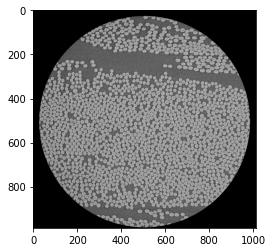

In [3]:
plt.imshow(fibres_xcth_img)

### Task 1

Experimentally verify the separability of the Gaussian convolution
kernel. <br>
Do this by convolving a test image with a 2D kernel, and
convolving the same image with two orthogonal 1D kernels. 
<br>
Subtract the result and verify that the difference is very small.

In [8]:
sigma = 5
s = 5*sigma
x = np.arange(-sigma, sigma+1).T
x = x.reshape(x.shape + (1,))
g = kernel.gaussian_1d(x, sigma)

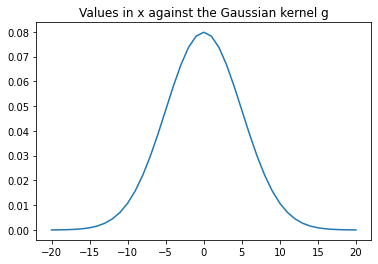

In [9]:
plt.title('Values in x against the Gaussian kernel g')
test_x = np.arange(-20, 21).T
test_g = kernel.gaussian_1d(test_x, sigma)
plt.plot(test_x, test_g)
plt.show()

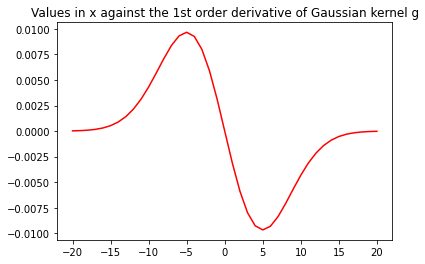

In [10]:
plt.title('Values in x against the 1st order derivative of Gaussian kernel g')
test_dg = kernel.dgaussian_1d(test_x, sigma)
plt.plot(test_x, test_dg, c='red')
plt.show()

In [31]:
convolve_1D_img = kernel.convolve_img(kernel.convolve_img(fibres_xcth_img, g), g.T)

g_2d = np.outer(g, g)
convolve_2D_img = kernel.convolve_img(fibres_xcth_img, g_2d)

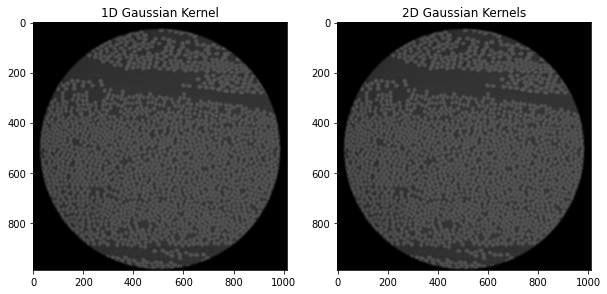

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(convolve_1D_img)
ax[0].set_title('1D Gaussian Kernel')
ax[1].imshow(convolve_2D_img)
ax[1].set_title('2D Gaussian Kernels')
plt.show()

Mean diff: 0.26600649052199943


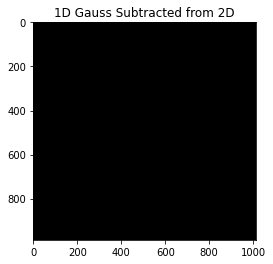

In [33]:
diff = convolve_2D_img-convolve_1D_img
print(f'Mean diff: {np.mean(diff)}')
plt.imshow(diff)
plt.title('1D Gauss Subtracted from 2D')
plt.show()

### Task 2

Investigate the difference between the derivative of the image convolved by a Gaussian 
<br>
and the image convolved with the derivative of the Gaussian as described in Eq. 1.7. 
<br>
Note that you can compute the derivative of the image by convolving with the kernel k = [0.5, 0, -0.5]

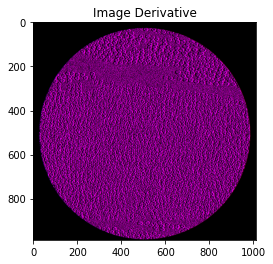

In [108]:
k = [0.5, 0, -0.5]
img_deriv = convolve(fibres_xcth_img.flatten(), k).reshape(fibres_xcth_img.shape)
plt.imshow(img_deriv)
plt.title('Image Derivative')
plt.show()

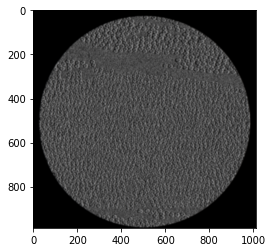

In [96]:
sigma = 2
deriv_gauss = gaussian_filter(img_deriv, sigma)